<a href="https://colab.research.google.com/github/mandar-mn/ML_CaseStudy/blob/main/Copy_of_ML_Case_Study_Team_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#reading Dataset
df = pd.read_csv(r"/content/drive/MyDrive/Case Study ML/Leads.csv")

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Observation:
1. The Column Prospect id seems to be unimportant [Claim]
2. Columns like Do Not Email, Do not Call, Get updates on DM Content, etc seems to be categorical as yes or no
3. Some values seems to be rubbish such as 'select' in some columns, These acts as Null values [Claim]

In [ ]:
df.shape

(9240, 37)

Observation:


There are 37 columns adn 9240 Rows in the dataset.

In [ ]:
df_copy = df.copy()
#Making a copy of dataframe in order to restore it incase of an emergency

In [ ]:
#Finding the information of the data
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Observation :


1.   Null values are present in the dataset
2.   Data type of columns are object integer and float



In [ ]:
#Finding Statistical information about the data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Checking Columns

In [ ]:
#Claim checking: 
#The Column Prospect id seems to be unimportant
df['Prospect ID']

0       7927b2df-8bba-4d29-b9a2-b6e0beafe620
1       2a272436-5132-4136-86fa-dcc88c88f482
2       8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3       0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4       3256f628-e534-4826-9d63-4a8b88782852
                        ...                 
9235    19d6451e-fcd6-407c-b83b-48e1af805ea9
9236    82a7005b-7196-4d56-95ce-a79f937a158d
9237    aac550fe-a586-452d-8d3c-f1b62c94e02c
9238    5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9
9239    571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Name: Prospect ID, Length: 9240, dtype: object

Observation: Prospect is an unimportant column, Decided to drop the collumn

In [ ]:
df.drop('Prospect ID', axis = 1, inplace = True)

In [ ]:
#Succesfully dropped Prospect Id
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# change nomenclature
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [ ]:
# Renaming the Columns
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

In [ ]:
df.columns

Index(['lead_number', 'lead_origin', 'lead_source', 'do_not_email',
       'do_not_call', 'converted', 'total_visits', 'time_on_website',
       'page_views_per_visit', 'last_activity', 'country', 'specialization',
       'source', 'occupation', 'course_selection_reason', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations', 'courses_updates',
       'tags', 'lead_quality', 'supply_chain_content_updates',
       'dm_content_updates', 'lead_profile', 'city',
       'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'asymmetrique_activity_score', 'asymmetrique_profile_score',
       'cheque_payment', 'mastering_interview', 'last_notable_activity'],
      dtype='object')

In [ ]:
# Selecting  all the  non-numeric columns i.e the columns with datatype as 'Object'
df_obj = df.select_dtypes(include='object')

In [ ]:
df_obj

,lead_origin,lead_source,do_not_email,do_not_call,last_activity,country,specialization,source,occupation,course_selection_reason,...,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,cheque_payment,mastering_interview,last_notable_activity
0,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,...,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,...,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,...,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,...,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,No,No,SMS Sent


In [ ]:
# Handeling the "Select = Null" claim
# Finding out the  columns that have "Select" as a value in it
select_func = lambda x: x.str.contains('Select', na=False)
cols_select = df_obj.columns[df_obj.apply(select_func).any()].tolist()
print (cols_select)

['specialization', 'source', 'lead_profile', 'city']


Observation: These are the colums containing "Select" as a value

In [ ]:
# replacing all the  values
df[cols_select] = df[cols_select].replace('Select', np.NaN)

In [ ]:
df.head()

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,...,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Handeling Null values

In [ ]:
# Checking for percent of null values in the dataframe
(df.isnull().sum() / df.shape[0]) * 100

lead_number                      0.000000
lead_origin                      0.000000
lead_source                      0.389610
do_not_email                     0.000000
do_not_call                      0.000000
converted                        0.000000
total_visits                     1.482684
time_on_website                  0.000000
page_views_per_visit             1.482684
last_activity                    1.114719
country                         26.634199
specialization                  36.580087
source                          78.463203
occupation                      29.112554
course_selection_reason         29.318182
search                           0.000000
magazine                         0.000000
newspaper_article                0.000000
x_education_forums               0.000000
newspaper                        0.000000
digital_advertisement            0.000000
through_recommendations          0.000000
courses_updates                  0.000000
tags                            36

After analysing, we decided to drop the columns having Null values greater than 40%

In [ ]:
df.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)

In [ ]:
df.shape

(9240, 26)

In [ ]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                      0.000000
lead_origin                      0.000000
lead_source                      0.389610
do_not_email                     0.000000
do_not_call                      0.000000
converted                        0.000000
total_visits                     1.482684
time_on_website                  0.000000
page_views_per_visit             1.482684
country                         26.634199
specialization                  36.580087
occupation                      29.112554
course_selection_reason         29.318182
search                           0.000000
magazine                         0.000000
newspaper_article                0.000000
x_education_forums               0.000000
newspaper                        0.000000
digital_advertisement            0.000000
through_recommendations          0.000000
courses_updates                  0.000000
supply_chain_content_updates     0.000000
dm_content_updates               0.000000
city                            39

In [ ]:
#Now checking the remaining columns having Null values, One by one
round((df.country.value_counts(dropna=False)/df.country.shape[0]) * 100, 2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   

Observation:
1. The most number of values are present for India
2. The highest count of values is followed by Null values
3. Remaining countries seems to have point (0.x) contribution in coutries columns.

In [ ]:
# From the observation we can see that the data is completely Skewed toward 'India'. 
# Therefore we will drop the 'Country' column
df.drop('country', axis = 1, inplace = True)

In [ ]:
# Checking for the course_selection_reason column
round(df.course_selection_reason.value_counts(dropna=False) / df.course_selection_reason.shape[0] * 100, 2)

Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: course_selection_reason, dtype: float64

In [ ]:
# From the observation it is observed that the data is skewed towards
#  'Better Career Prospects' & NaN  is upto 30%
# It is better to drop this column
df.drop('course_selection_reason', axis = 1, inplace = True)

In [ ]:
# Working on 'occupation' column
round((df.occupation.value_counts( dropna = False)/ df.occupation.shape[0]) * 100, 2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: occupation, dtype: float64

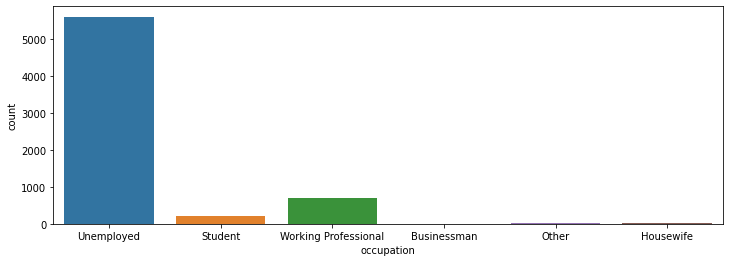

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.countplot(x = 'occupation', data = df)

Observation: 
1. It is observed that the data is highly skewed toward 'Unemployed' &


In [ ]:
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [ ]:
df.occupation.value_counts()

Unemployed              5600
Working Professional     706
Student and Others       244
Name: occupation, dtype: int64

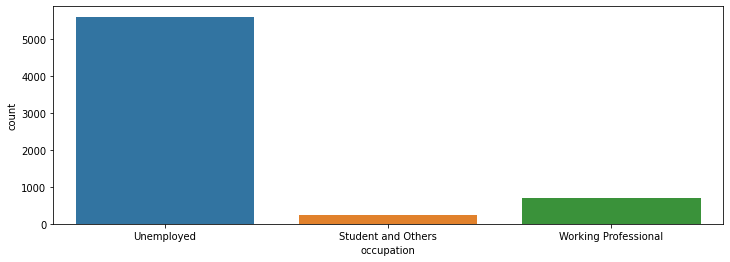

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'occupation', data = df)
#Combined Occupation as Unemployed, Student and Others occupation and working profession

In [ ]:
test = df.copy()

In [ ]:
round((test.occupation.value_counts()/ test.occupation.shape[0]) * 100, 2)

Unemployed              60.61
Working Professional     7.64
Student and Others       2.64
Name: occupation, dtype: float64

In [ ]:
df.occupation.value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: occupation, dtype: float64

In [ ]:
df['occupation'] = df.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.85496183, 0.10778626, 0.03725191], size = len(test))))

In [ ]:
round((df.occupation.value_counts(dropna=False)/ df.occupation.shape[0]) * 100, 2)

Unemployed              85.36
Working Professional    10.71
Student and Others       3.93
Name: occupation, dtype: float64

# this is mine

In [ ]:
df.occupation.isnull().sum()

0

In [ ]:
#Working on Specialization Column
round(df.specialization.value_counts(normalize = True, dropna = False) * 100, 2)

NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: specialization, dtype: float64

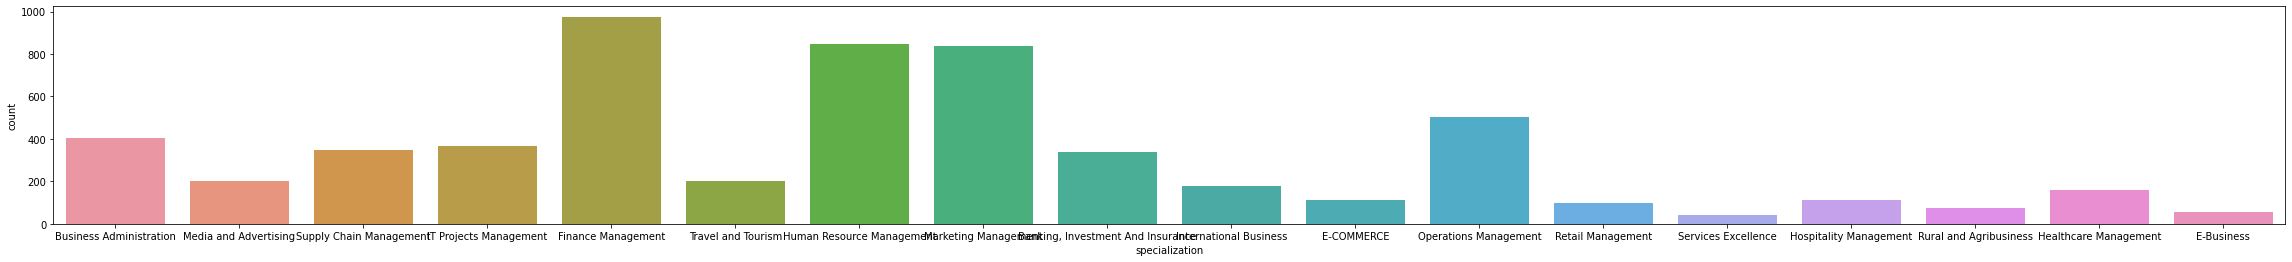

In [ ]:
import seaborn as sns
plt.figure(figsize=(40, 4))
sns.countplot(x = 'specialization', data = df)

In [ ]:
# For specialization, we will first combine categories based on the course type, 
# and then impute proportionally to maintain the distribution and not introduce bias

In [ ]:
#First, Categorizing based on Management
df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') | 
       (df.specialization == 'Marketing Management') |  (df.specialization == 'Operations Management') |
       (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management') |
       (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management') |
       (df.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

In [ ]:
# Categorising on Business Courses
df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business') | 
       (df.specialization == 'Rural and Agribusiness') | (df.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

In [ ]:
# Categorising on Industry Courses
df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Media and Advertising') |
       (df.specialization == 'Travel and Tourism') | (df.specialization == 'Services Excellence') |
       (df.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'


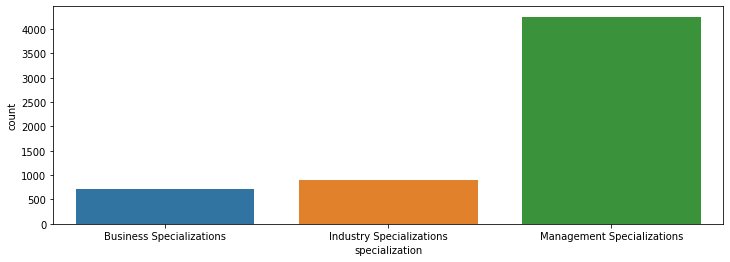

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'specialization', data = df)

Observation:
* From above plot it can be concluded that maximum count is of Management Specialization course whereas least count is for Business Specialization courses


In [ ]:
df.specialization.value_counts(normalize = True) * 100

Management Specializations    72.576792
Industry Specializations      15.290102
Business Specializations      12.133106
Name: specialization, dtype: float64

In [ ]:
df.specialization = df.specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df))))

In [ ]:
df.specialization.isnull().sum()
# Null values are eliminated in specialization column

0

In [ ]:
# Working on City Column
round(df.city.value_counts(normalize = True, dropna = False) * 100, 2)

NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: city, dtype: float64

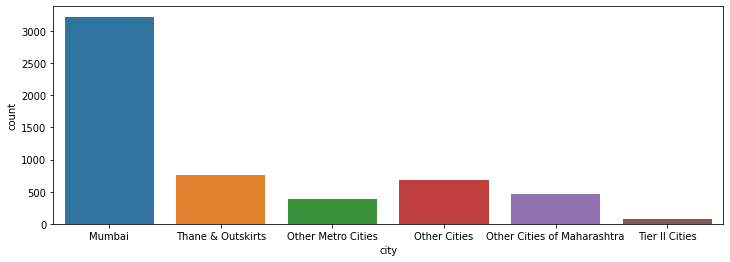

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'city', data = df)

In [ ]:
# categorize all non-mumbai, but Maharashtra cities
df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtra Cities'

In [ ]:
# categorize all other cities
df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtra Cities'


In [ ]:
df.city.value_counts(normalize = True) * 100

Mumbai                           57.835218
Non-Mumbai Maharashtra Cities    21.701669
Non-Maharashtra Cities           20.463113
Name: city, dtype: float64

In [ ]:
df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))


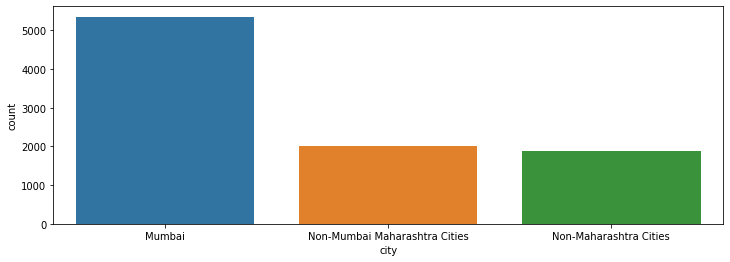

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'city', data = df)

In [ ]:
df.city.isnull().sum()

0

In [ ]:
df.shape

(9240, 24)

In [ ]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.000000
lead_origin                     0.000000
lead_source                     0.389610
do_not_email                    0.000000
do_not_call                     0.000000
converted                       0.000000
total_visits                    1.482684
time_on_website                 0.000000
page_views_per_visit            1.482684
specialization                  0.000000
occupation                      0.000000
search                          0.000000
magazine                        0.000000
newspaper_article               0.000000
x_education_forums              0.000000
newspaper                       0.000000
digital_advertisement           0.000000
through_recommendations         0.000000
courses_updates                 0.000000
supply_chain_content_updates    0.000000
dm_content_updates              0.000000
city                            0.000000
cheque_payment                  0.000000
mastering_interview             0.000000
dtype: float64

In [ ]:
# determine unique values for all object datatype columns
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [ ]:
# As can be seen from the above output, the categorical columns (i.e. number of unique values > 2) are:
# lead_origin
# lead_source

In [ ]:
# Working on lead_origin column
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: lead_origin, dtype: float64

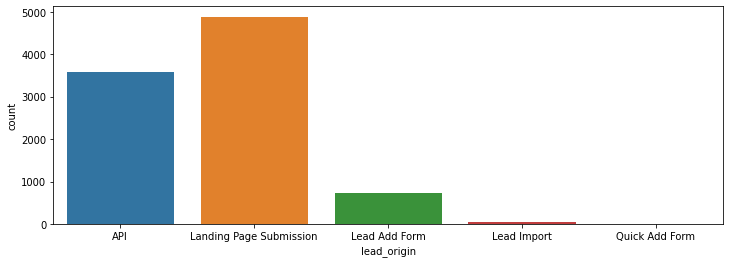

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'lead_origin', data = df)

In [ ]:
# Combining the columns with lower percentage
df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

In [ ]:
df.lead_origin.isnull().sum()
#No Null values present

0

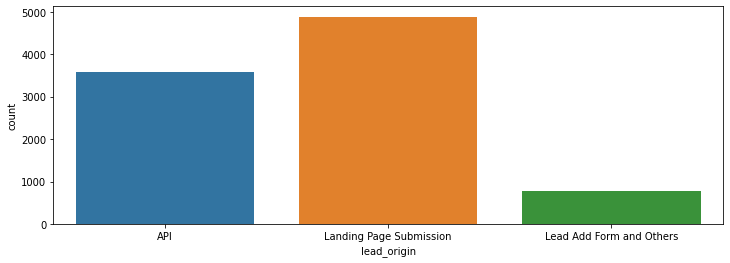

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'lead_origin', data = df)
#Combined the leads as API, LandingPage Sub,ission lead_origin and Lead Add Form and Others

Succesfully Combined

In [ ]:
# Working with the 'lead_source' column
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: lead_source, dtype: float64

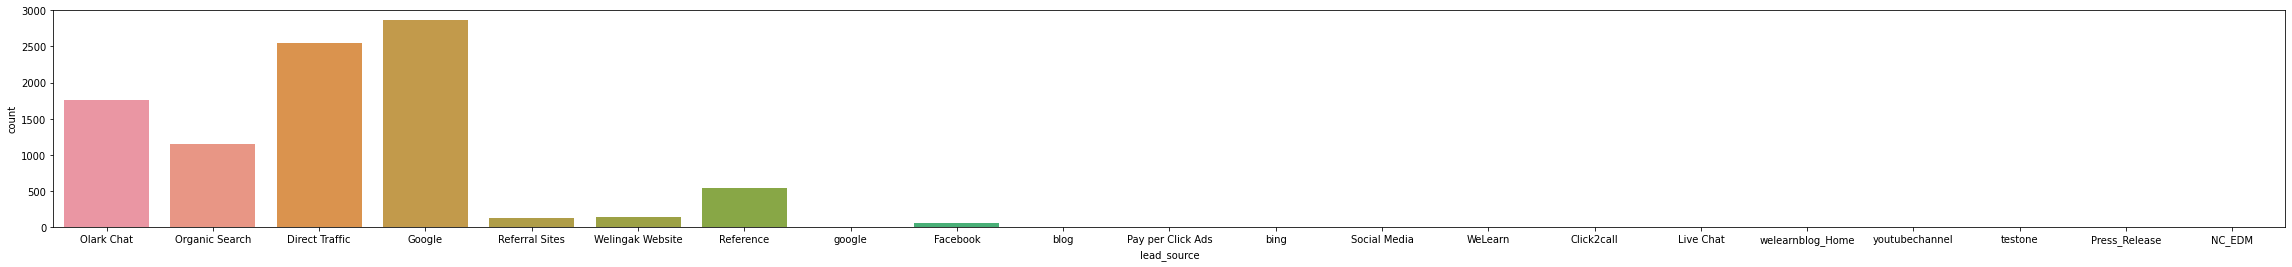

In [ ]:
plt.figure(figsize=(40, 4))
sns.countplot(x = 'lead_source', data = df)

In [ ]:
#Checking for the mode value from the data
df.lead_source.mode()

0    Google
dtype: object

In [ ]:
#Imputing missing values with mode if the data that is mode.
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [ ]:
df.lead_source.value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: lead_source, dtype: int64

In [ ]:
df.loc[(df.lead_source == 'Welingak Website') | (df.lead_source == 'Referral Sites') | 
       (df.lead_source == 'Facebook') |  (df.lead_source == 'bing') |
       (df.lead_source == 'google') | (df.lead_source == 'Click2call') |
       (df.lead_source == 'Press_Release') | (df.lead_source == 'Social Media') |
       (df.lead_source == 'Live Chat') | (df.lead_source == 'youtubechannel') |
       (df.lead_source == 'testone') | (df.lead_source == 'Pay per Click Ads') |
       (df.lead_source == 'welearnblog_Home') | (df.lead_source == 'WeLearn') |
       (df.lead_source == 'blog') | (df.lead_source == 'NC_EDM') , 'lead_source'] = 'Other Social Sites'

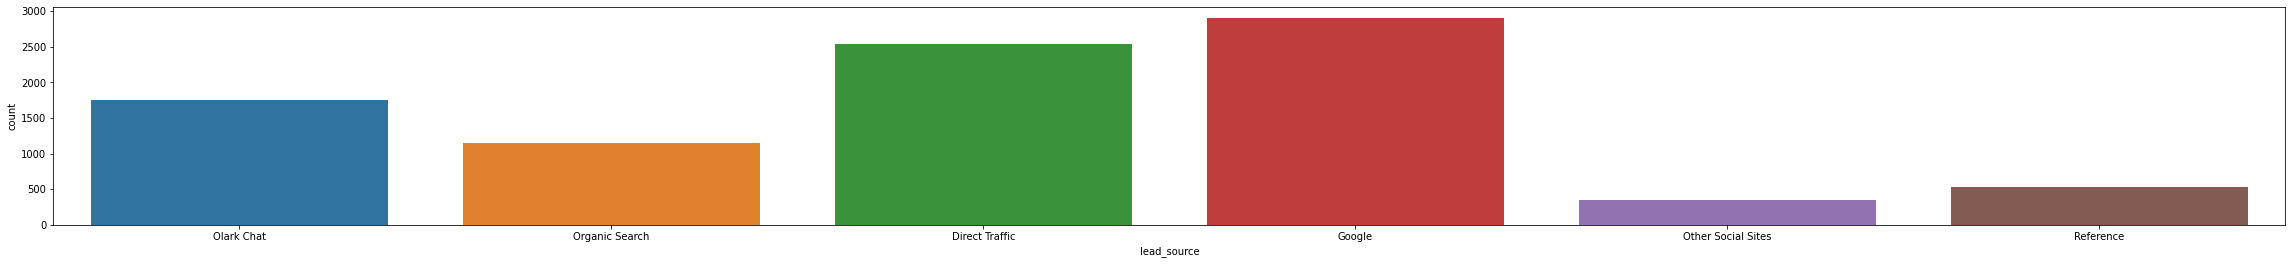

In [ ]:
plt.figure(figsize=(40, 4))
sns.countplot(x = 'lead_source', data = df)
#Combining the lead sources

# Handling Binary Column


In [ ]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [ ]:
#Observation:
# Columns having 1 values can be dropped.

In [ ]:
test_df = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

for i in test_df.columns:
  var = (test_df[i].value_counts(normalize = True)) * 100
  print(var)

No     92.056277
Yes     7.943723
Name: do_not_email, dtype: float64
No     99.978355
Yes     0.021645
Name: do_not_call, dtype: float64
No     99.848485
Yes     0.151515
Name: search, dtype: float64
No     99.978355
Yes     0.021645
Name: newspaper_article, dtype: float64
No     99.989177
Yes     0.010823
Name: x_education_forums, dtype: float64
No     99.989177
Yes     0.010823
Name: newspaper, dtype: float64
No     99.95671
Yes     0.04329
Name: digital_advertisement, dtype: float64
No     99.924242
Yes     0.075758
Name: through_recommendations, dtype: float64
No     68.744589
Yes    31.255411
Name: mastering_interview, dtype: float64


In [ ]:
# Dropping Binary values having Biased data
drop_cols = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']
df.drop(drop_cols, axis = 1, inplace=True)

In [ ]:
df.shape

(9240, 12)

# Handling numerical Columns

In [ ]:
# Checking for the Null Values
df.isnull().sum()

lead_number               0
lead_origin               0
lead_source               0
do_not_email              0
converted                 0
total_visits            137
time_on_website           0
page_views_per_visit    137
specialization            0
occupation                0
city                      0
mastering_interview       0
dtype: int64

In [ ]:
#Handeling missing values of total_visits
df.total_visits.fillna(df.total_visits.median(), inplace=True)

In [ ]:
#Handeling missing values of page_views_per_visit
df.page_views_per_visit.fillna(df.page_views_per_visit.median(), inplace=True)

In [ ]:
df.isnull().sum()
#Succesfully handelled all the missing values

lead_number             0
lead_origin             0
lead_source             0
do_not_email            0
converted               0
total_visits            0
time_on_website         0
page_views_per_visit    0
specialization          0
occupation              0
city                    0
mastering_interview     0
dtype: int64

In [ ]:
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   int64  
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   float64
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 866.4+ KB


# EDA [Exploratory Data Analysis]

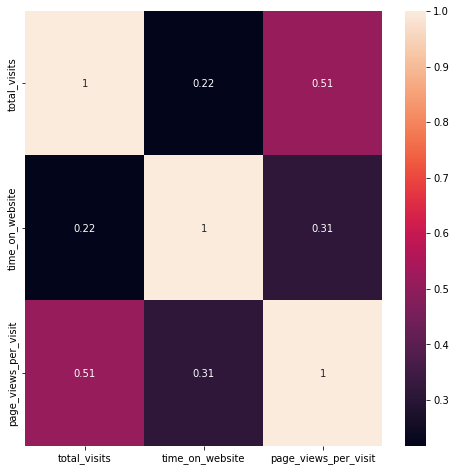

In [ ]:
#Checking for correlation
plt.figure(figsize = (8,8))
sns.heatmap(df[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), annot = True)
plt.show()

Observation:
* No Major correlation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


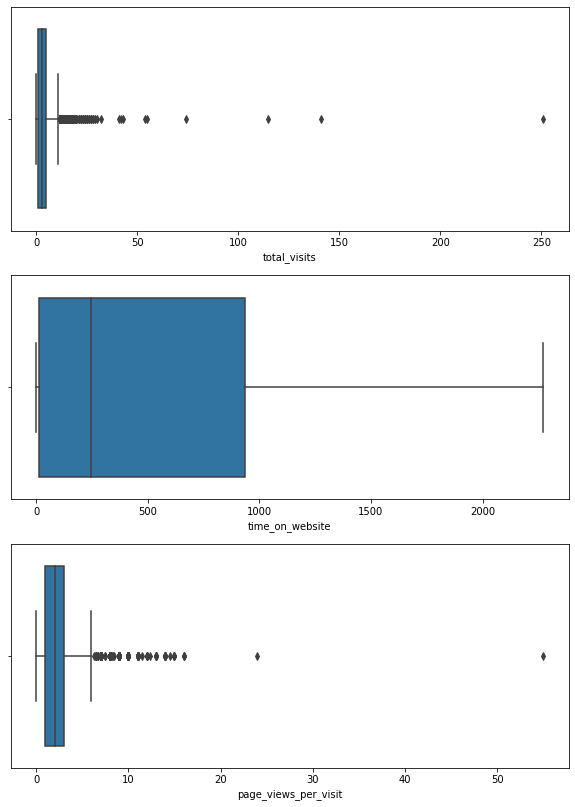

In [ ]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df.page_views_per_visit)
plt.show()

Observation :
* Looking at both the box plots and the statistics, there are upper bound outliers in both total_visits and page_views_per_visit columns.


<Figure size 720x1008 with 0 Axes>

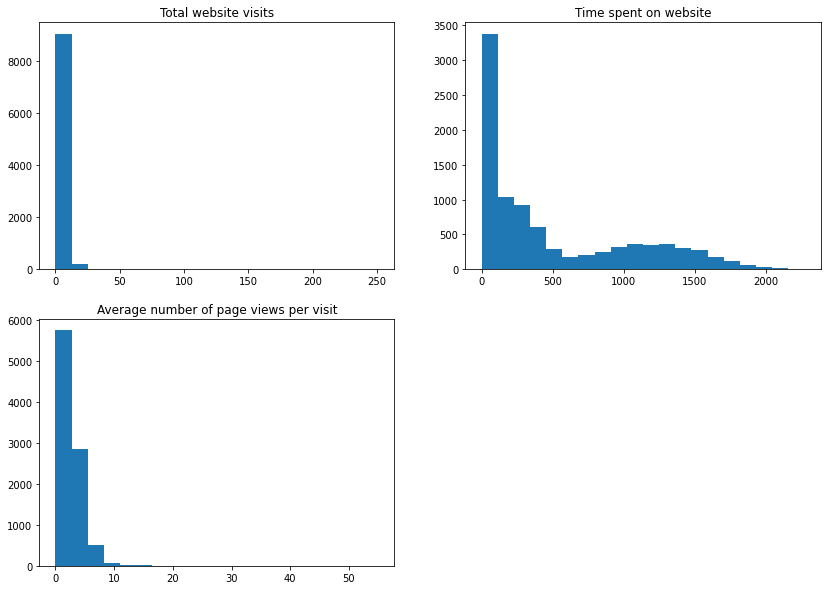

In [ ]:
plt.figure(figsize = (10, 14))
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()


Observation:
1. The total website visit is maximum in the range of 0 to 25
2. The maximum time spent on website is highest in the range from 0 -100 which is gradually decreasing with time
3. The Average number of page visit per day is max at 0 wheras there is a half way drop in the range approx between 2-3 & than gradually decreasing


# Handeling Categorical Data

In [ ]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
specialization = 3
occupation = 3
city = 3
mastering_interview = 2


In [ ]:
df.mastering_interview.value_counts()

No     6352
Yes    2888
Name: mastering_interview, dtype: int64

In [ ]:
#Considering columns having 2 uique values
df_test = ['do_not_email', 'mastering_interview']
for i in df_test:
      df[i] = df[i].replace({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Management Specializations,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Management Specializations,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Management Specializations,Unemployed,Mumbai,0


In [ ]:
copy_df = df.copy()

In [ ]:
# Creating dummy values for categorical data
dummy = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)
df = pd.concat([df, dummy], axis=1)
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis= 1, inplace=True)

In [ ]:
df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,1,1,0,0,0


## Checking for Outliers at various level


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


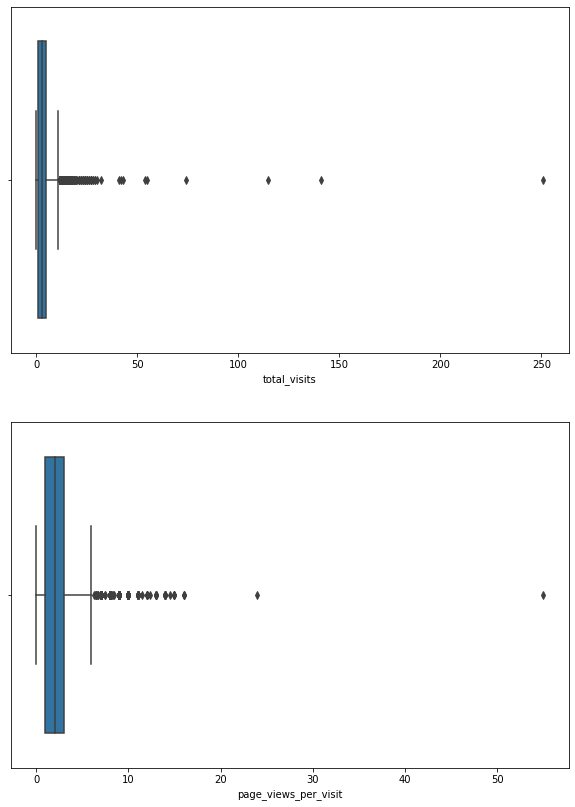

In [ ]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)
plt.show()


In [ ]:
df.total_visits.loc[df.total_visits >= df.total_visits.quantile(0.99)] = df.total_visits.quantile(0.99)
df.page_views_per_visit.loc[df.page_views_per_visit >= 
                            df.page_views_per_visit.quantile(0.99)] = df.page_views_per_visit.quantile(0.99)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


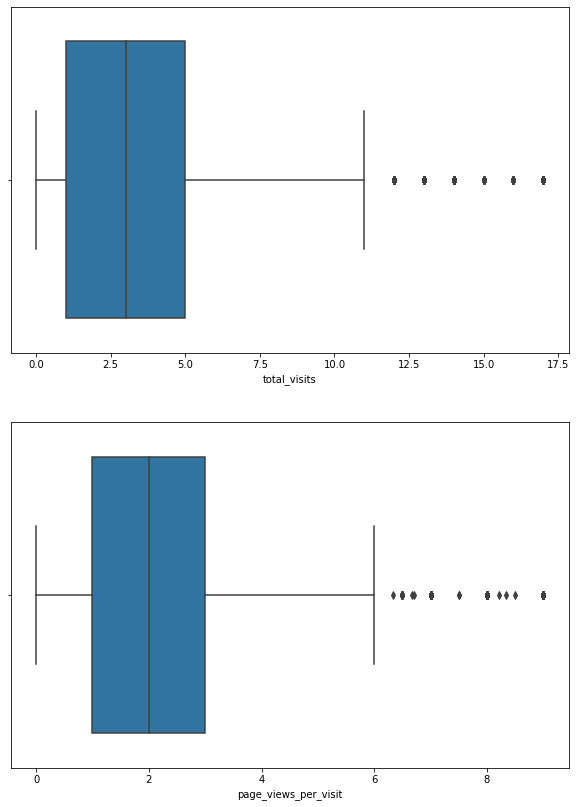

In [ ]:
#Handeling Outliers
plt.figure(figsize = (10, 14))
plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)
plt.show()

# Train Test Split

In [ ]:
df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,1,1,0,0,0


In [ ]:
X = df.drop(['lead_number', 'converted'], axis=1).values
y = df['converted'].values

In [ ]:
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 5.000e+00, 6.740e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.000e+00, 1.532e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 2.000e+00, 1.990e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 3.000e+00, 4.990e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 6.000e+00, 1.279e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [ ]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2, random_state = 42)

In [ ]:
X_test

array([[  0.,   8., 252., ...,   0.,   0.,   0.],
       [  1.,   2., 929., ...,   0.,   1.,   0.],
       [  1.,   1.,   2., ...,   0.,   1.,   0.],
       ...,
       [  0.,   3.,  97., ...,   0.,   0.,   0.],
       [  0.,   4., 409., ...,   0.,   0.,   0.],
       [  0.,   3., 452., ...,   0.,   0.,   0.]])

In [ ]:
#Standardization of Xtrain
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [ ]:
X_train

array([[ 3.44320377, -0.41759893, -0.45416471, ..., -0.34592009,
        -0.5013947 ,  1.90795737],
       [-0.29042719, -1.03044216, -0.88909718, ..., -0.34592009,
        -0.5013947 ,  1.90795737],
       [-0.29042719, -0.11117732, -0.16845593, ..., -0.34592009,
        -0.5013947 , -0.52412073],
       ...,
       [-0.29042719, -1.03044216, -0.88909718, ..., -0.34592009,
        -0.5013947 ,  1.90795737],
       [-0.29042719, -0.11117732, -0.56335278, ..., -0.34592009,
         1.99443671, -0.52412073],
       [-0.29042719, -0.41759893,  2.40292308, ..., -0.34592009,
        -0.5013947 , -0.52412073]])

## Model Building

In [ ]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(sc.transform(X_test))

## Model Evaluation

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[961, 270],
       [146, 471]])

In [ ]:
accuracy_score(y_pred, y_test)

0.7748917748917749

In [ ]:
df_test = pd.DataFrame(y_test.copy(), columns=['Actual'])

In [ ]:
df_test['Predicted'] = pd.DataFrame(y_pred)

In [ ]:
df_test

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1843,1,1
1844,1,1
1845,0,1
1846,1,0


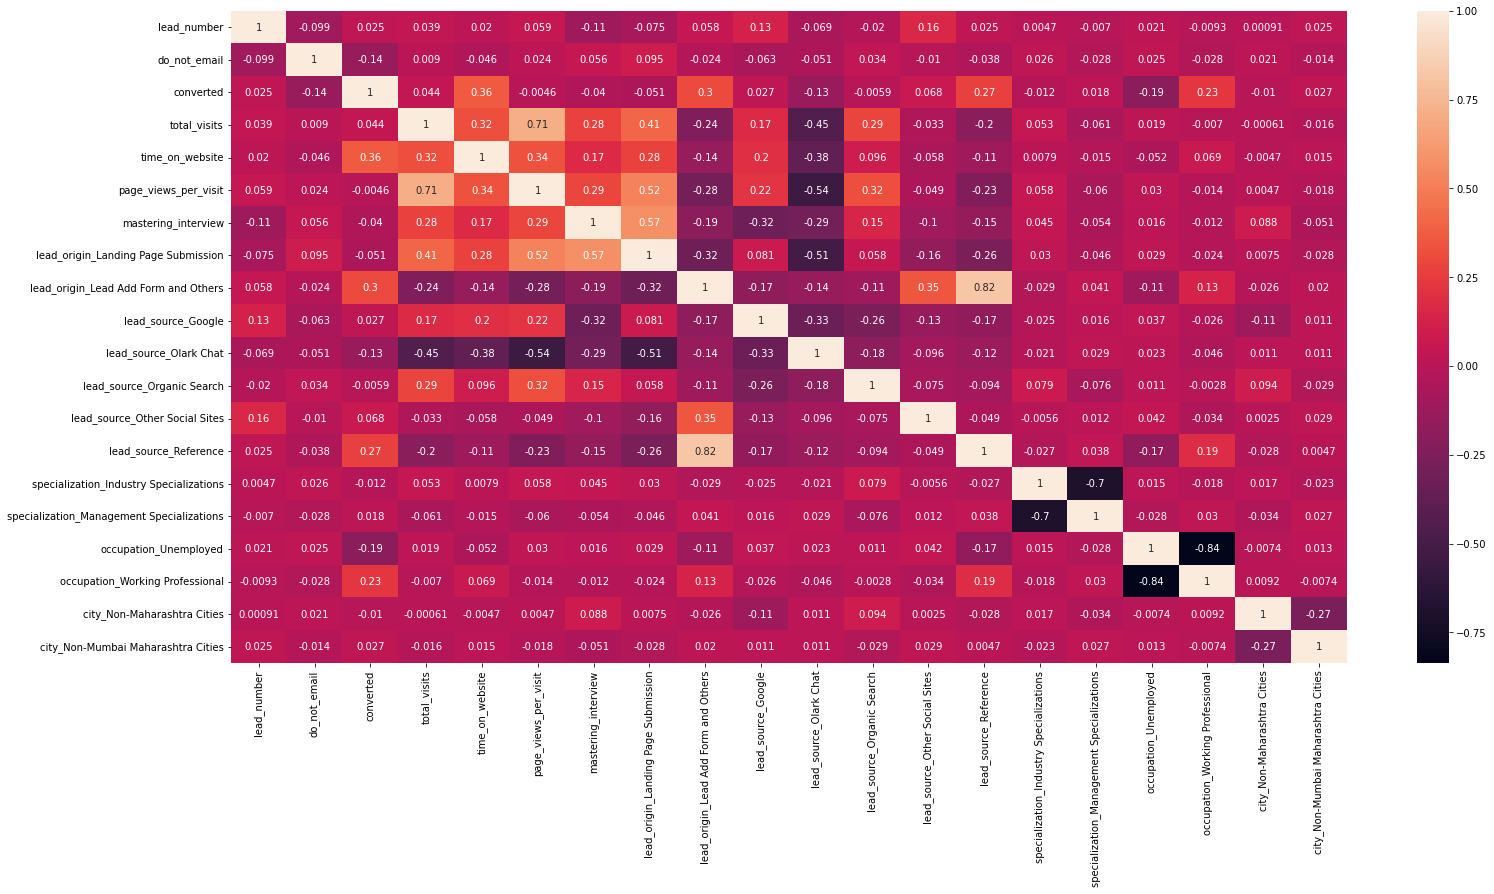

In [ ]:
#Checking for correlation
plt.figure(figsize = (25, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()

#1.  Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?
From Correlation matrix, it is defined that
1. **Time_on_website** orginaly called as "*total_time_spent_on_website*"


    -> The Correlation Matrix defines that, the Time_on_website has 36% Positive correlation with converted, which is the target column.

2. lead_origin_Lead Add Form and Others originaly called lead_origin


    -> From the Correlation matrix we can check that, Lead_origin_Landing Page Submission 3%  Positive of correlation with the target column  


3. lead_source_Reference orginaly called as lead_source


    -> Correlation Matrix shows the correlation of lead_source of 27% Positive with converted[Target column]


4. occupation_Working Professional orignally known as occupation


    ->  occupation_Working Professional has 23%  Positive correlation with converted [Target column] 


5. occupation_unemployed 


    -> occupation_unemployed has negative 19% correlation with converted which is the target column.

# 2. What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

Ans: From the Correlation matrix, it is understood that,
1. Lead Source_Reference
2. lead_origin_Lead Add Form and Others Originally called as Lead Source_Social Media
3. Lead Source_Olark Chat

In [ ]:
df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,1,1,0,0,0


# 3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


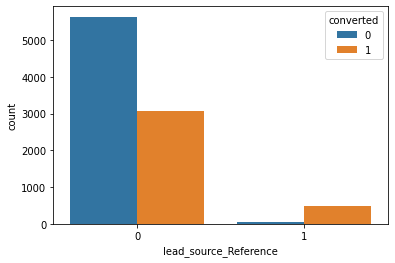

In [ ]:
sns.countplot(df['lead_source_Reference'], hue=df['converted'])

In [ ]:
pd.crosstab(df.lead_source_Reference, df.converted)

converted,0,1
lead_source_Reference,,
0,5635,3071
1,44,490


1. The Above countplot shows that, the lead source coming from refernce has more probability of conversion, thus company can focus on people whose lead source is reference

2. The correlation matrix shows that people spending more time on website [column- total_time_spent_on_website] have higher rate of conversion, thus company should focus on people spending more time on website

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


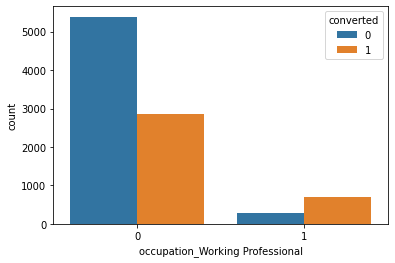

In [ ]:
sns.countplot(df['occupation_Working Professional'], hue=df['converted'])

from above plot we can say that, 
3. People having working profession as Profession have higher probability of getting converted, The company can focus on people having working profession as Proffessional.

# 4. Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


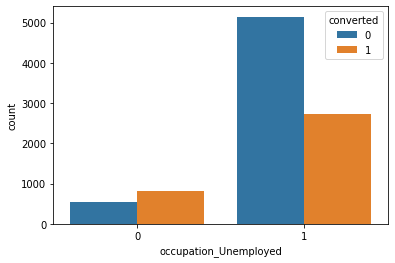

In [ ]:
sns.countplot(df['occupation_Unemployed'], hue=df['converted'])

1. At time when company wants to minimize the rate of useless phone calls, the team may not focus on people having occupation as unemployed. Because from the above plot we can understand that, the occupation_umemployed people are less converted

In [ ]:
df.columns

Index(['lead_number', 'do_not_email', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'mastering_interview',
       'lead_origin_Landing Page Submission',
       'lead_origin_Lead Add Form and Others', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Other Social Sites', 'lead_source_Reference',
       'specialization_Industry Specializations',
       'specialization_Management Specializations', 'occupation_Unemployed',
       'occupation_Working Professional', 'city_Non-Maharashtra Cities',
       'city_Non-Mumbai Maharashtra Cities'],
      dtype='object')

In [ ]:
occupation_analysis = pd.get_dummies(copy_df['occupation'])

In [ ]:
occupation_analysis.columns

Index(['Student and Others', 'Unemployed', 'Working Professional'], dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


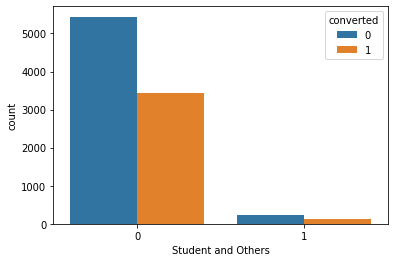

In [ ]:
sns.countplot(occupation_analysis['Student and Others'], hue=df['converted'])

In [ ]:
pd.crosstab(occupation_analysis['Student and Others'], df.converted)

converted,0,1
Student and Others,,
0,5439,3438
1,240,123


2. The people being Students and others have less probability of converting, lokks like they are already studying and not want to enroll in courses specially designed for the working professionals, so at time of minimizing the rate of useless phone calls, such people are ignored

# Conclusion:
1. Number of Unemployed people were more
2. Maximum no. of specilisation was in Finance_Management
3. Maximum no. of people were from Mumbai
4. Maximum lead origin was from Landing Page Submission
5. Maximum lead_source was from Google with approx. 31%
6. Toptal_visit & page_views_per_visit had maximum outliers
7. Total time spent on website has maximum variance in data